system of equations to be solved: [Reference](https://freshrimpsushi.github.io/posts/newton-raphson-method/)

$\large\begin{cases}x+\cos{(x-y)}=0\\-y+\sin{(x-y)}=0\end{cases}$

In [1]:
import numpy as np
import copy
import matplotlib.pyplot as plt

In [2]:
def func(v):
    x, y = v
    return np.array([ x+np.cos(x-y), -y+np.sin(x+y) ])

In [3]:
def jocobian(v):
    x, y = v
    return np.array([[1-np.sin(x-y), np.sin(x-y) ], [np.cos(x+y), -1 + np.cos(x+y)]])

$\large(x+\cos{(x-y)})^{2}+(-y+\sin{(x-y)})^2$

In [4]:
def loss(v):
    x, y = v
    return (x+np.cos(x-y))**2 + (np.sin(x+y) -y)**2

In [5]:
def loss_gradient(v):
    x, y = v
    return np.array([ 2*(1-np.sin(x-y))*(x+np.cos(x-y)) + 2*np.cos(x+y)*(np.sin(x+y) -y), 
                    2*(np.sin(x-y))*(x+np.cos(x-y)) + 2*(-1+np.cos(x+y))*(np.sin(x+y) -y)])

# Newton's method

$\displaystyle \large f(x_{n+1})=f(x_{n}) - \frac{f(x_{n})}{f'(x_{n})}$

In [6]:
def newton(array, n_iter = 30):
    for _ in range(n_iter):
        array -= np.linalg.inv(jocobian(array)).dot(func(array))
    return array

In [7]:
def newton_path(array, n_iter = 100):
    array = copy.deepcopy(array)
    result = []
    for _ in range(n_iter):
        a1 = copy.deepcopy(array)
        if np.square(func(a1)).sum()>20:
            break
        result.append(a1)
        
        delta = np.linalg.inv(jocobian(array)).dot(func(array))
        array -= delta
    return np.array(result)

# Gradient descent

$\displaystyle \large \theta^{(n+1)} := \theta^{(n)} - \eta\ \nabla_{\theta}J(\theta^{(n)}) = \theta_{n} - \eta\ \frac{\partial J(\theta^{(n)})}{\partial \theta} $

In [8]:
# gradient descent
def gd(array, eta = .0001, n_iter = 100000):
    for _ in range(n_iter):
        array -= loss_gradient(array)*eta
    return array

In [9]:
def gd_path(array, eta = .0001, n_iter = 10):
    array = copy.deepcopy(array)
    result = []
    for _ in range(n_iter):
        a1 = copy.deepcopy(array)
        result.append(a1)
        
        array -= loss_gradient(array)*eta
    return np.array(result)

In [10]:
def momentum_path(array, v=0, m = .5, eta = .001, n_iter = 10000):
    array = copy.deepcopy(array)
    result = []
    for _ in range(n_iter):
        a1 = copy.deepcopy(array)
        result.append(a1)
        
        v = m*v - loss_gradient(array)*eta
        array += v
    return np.array(result)

In [11]:
def adagrad_path(array, initial_accumulator_value = .1, eta = .001, n_iter = 10000):
    array = copy.deepcopy(array)
    result = []
    g = initial_accumulator_value
    for _ in range(n_iter):
        a1 = copy.deepcopy(array)
        result.append(a1)
        
        g += np.square(loss_gradient(array))
        array = array - (eta/np.sqrt(g))*loss_gradient(array)
    return np.array(result)

In [18]:
x_ = np.linspace(-3,3,3000)
y_ = np.linspace(-3,3,3000)

In [19]:
xm, ym = np.meshgrid(x_, y_)

In [20]:
xm_ = xm.ravel()
ym_ = ym.ravel()

In [21]:
fv = np.array([loss([xm_[i], ym_[i]]) for i in range(xm_.size)])

In [23]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

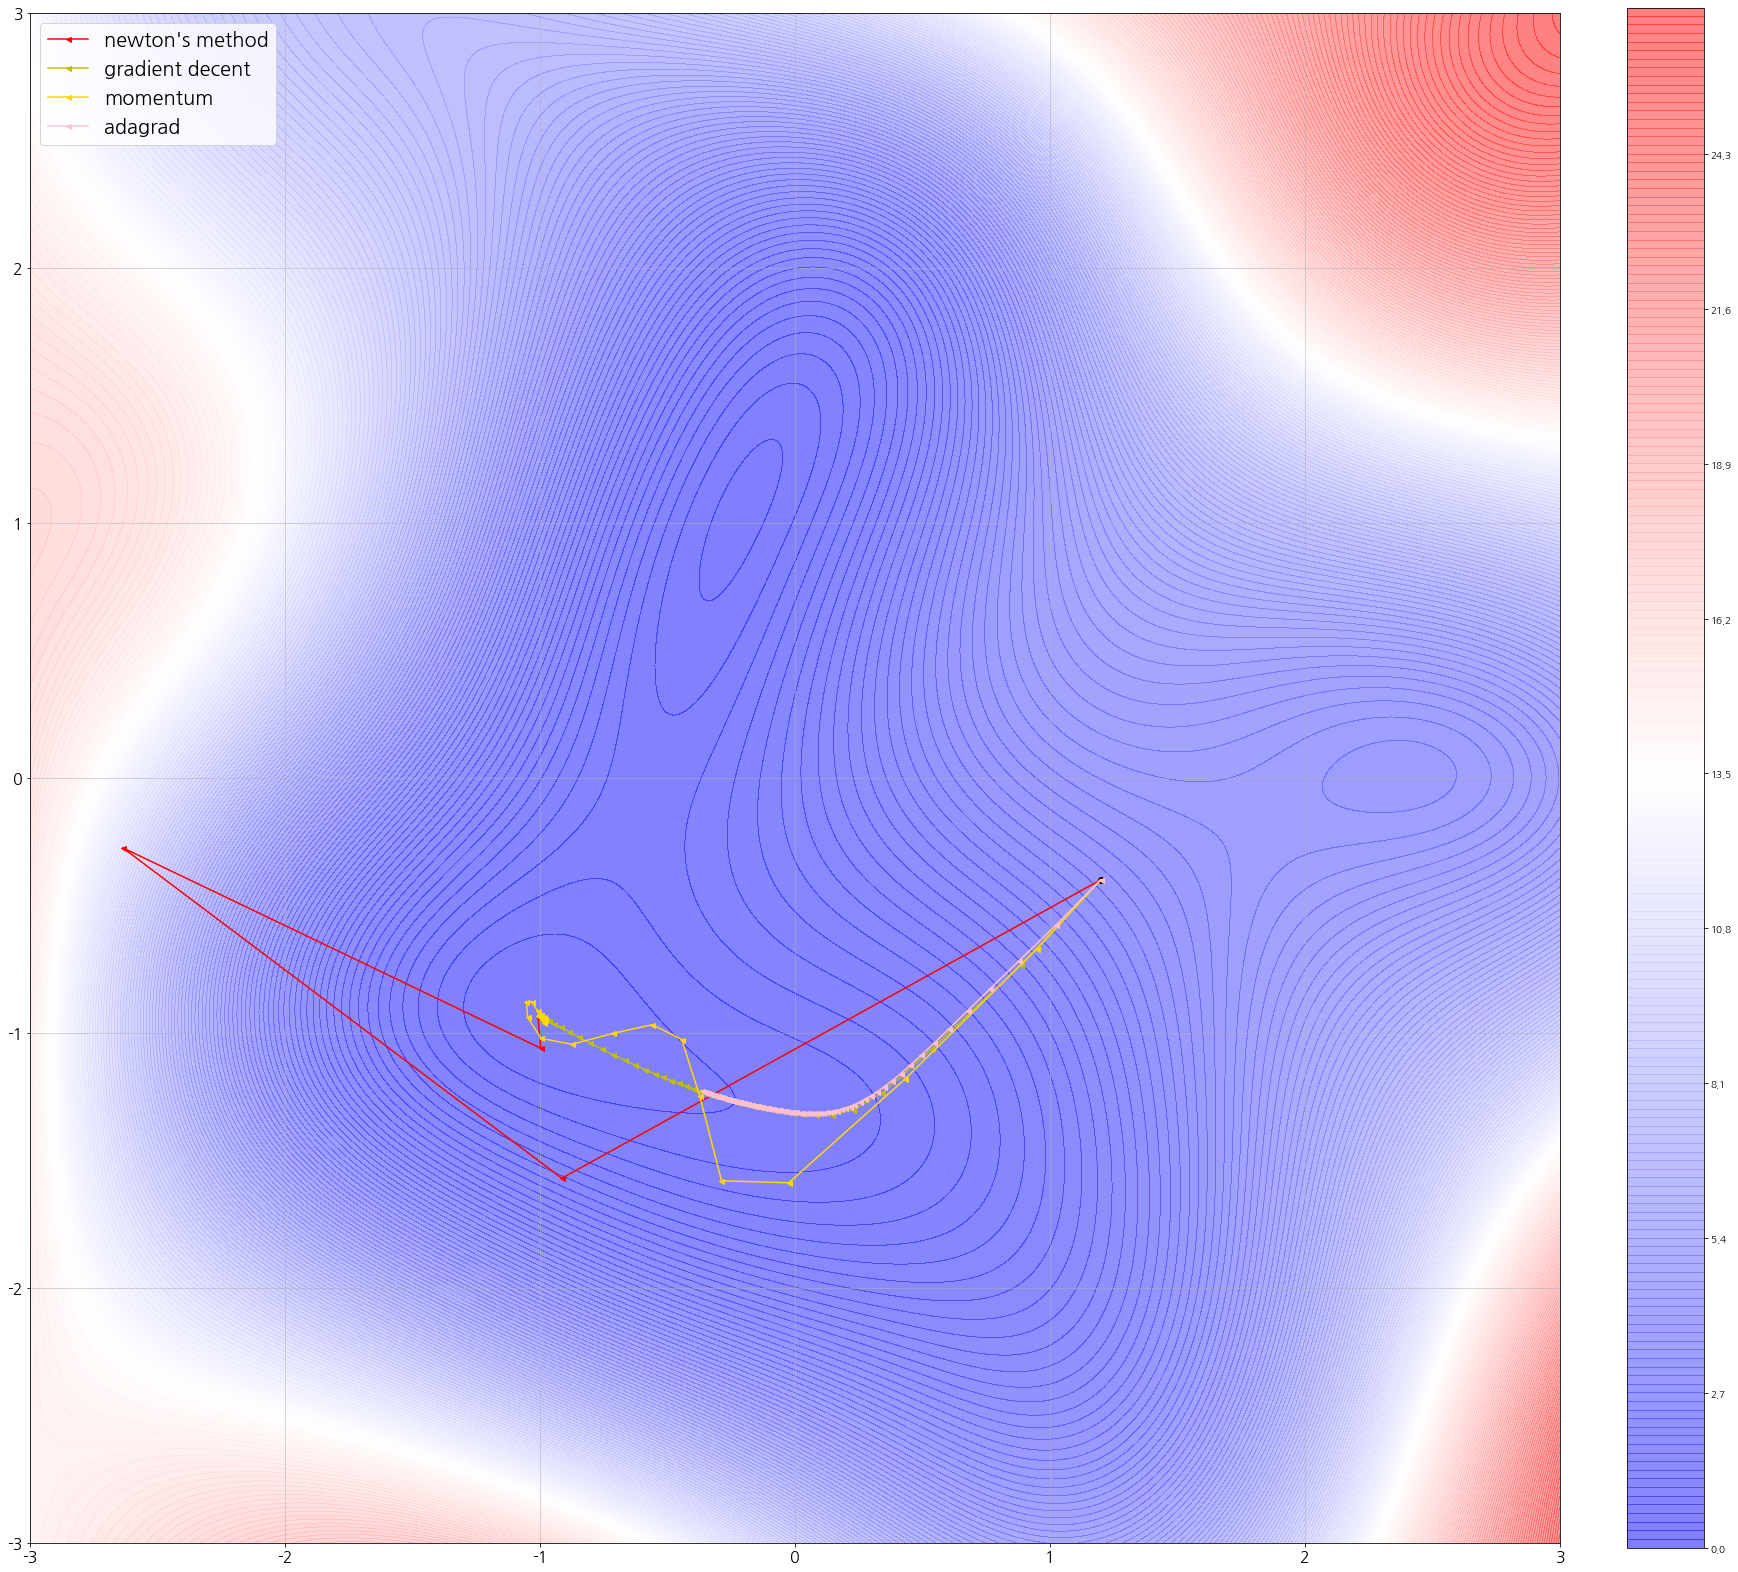

In [30]:
fig = plt.figure(figsize=(30,30))
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.grid(.5, alpha=1., linewidth=.5)
ctf = plt.contourf(xm, ym, fv.reshape(xm.shape), cmap =plt.cm.bwr, alpha = .5, levels=200)
# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(ctf,  format='%.1f',fraction=0.046, pad=0.04)

initial = [1.2,-.4]
plt.scatter(*initial, color='k')

markersize = 5
learning_rate = .2

npath = newton_path(initial, n_iter=30)
plt.plot(npath[:, 0], npath[:,1], color='r', marker='<', markersize=markersize, label="newton's method")

gpath = gd_path(initial, eta=learning_rate, n_iter=100)
plt.plot(gpath[:, 0], gpath[:,1], color='y', marker='<', markersize=markersize, label='gradient decent')

mpath = momentum_path(initial, v=.1, m=.6, eta=learning_rate, n_iter=100)
plt.plot(mpath[:, 0], mpath[:,1], color='gold', marker='<', markersize=markersize, label='momentum')

adpath = adagrad_path(initial, initial_accumulator_value=.7, eta=learning_rate, n_iter=100)
plt.plot(adpath[:, 0], adpath[:,1], color='pink', marker='<', markersize=markersize, label='adagrad')

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=20, loc='upper left')
plt.show()

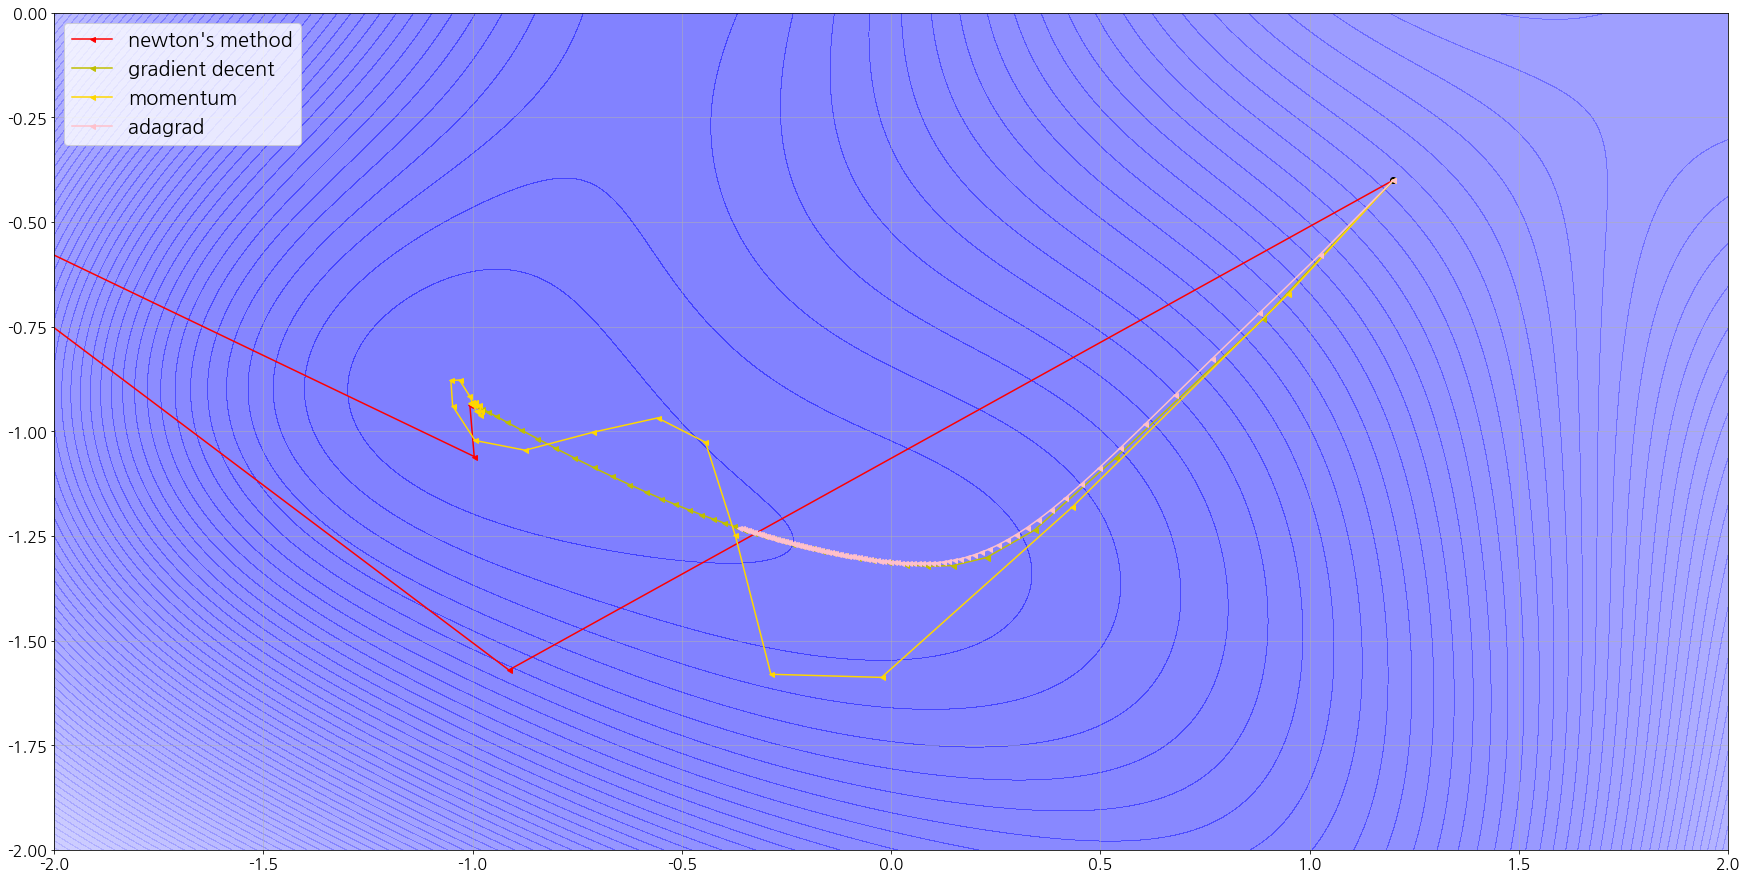

In [31]:
fig = plt.figure(figsize=(30,30))
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.grid(.5, alpha=1., linewidth=.5)
ctf = plt.contourf(xm, ym, fv.reshape(xm.shape), cmap =plt.cm.bwr, alpha = .5, levels=200)
# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.05)
# plt.colorbar(ctf,  format='%.1f',fraction=0.046, pad=0.04)

initial = [1.2,-.4]
plt.scatter(*initial, color='k')

markersize = 5
learning_rate = .2

npath = newton_path(initial, n_iter=30)
plt.plot(npath[:, 0], npath[:,1], color='r', marker='<', markersize=markersize, label="newton's method")

gpath = gd_path(initial, eta=learning_rate, n_iter=100)
plt.plot(gpath[:, 0], gpath[:,1], color='y', marker='<', markersize=markersize, label='gradient decent')

mpath = momentum_path(initial, v=.1, m=.6, eta=learning_rate, n_iter=100)
plt.plot(mpath[:, 0], mpath[:,1], color='gold', marker='<', markersize=markersize, label='momentum')

adpath = adagrad_path(initial, initial_accumulator_value=.7, eta=learning_rate, n_iter=100)
plt.plot(adpath[:, 0], adpath[:,1], color='pink', marker='<', markersize=markersize, label='adagrad')

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xlim(-2,2)
plt.ylim(-2,0)
plt.legend(fontsize=20, loc='upper left')
plt.show()